# What is the Exploratory Data Analysis (EDA)? 
 
`What you should do when a new, unknown dataset is given.`

Here we are going to review the most important techniques in order to perform a successful exploration of data. If you get meaningful insights, it often means that you even have a good advantage over other competitors. If the intuition about data contnent is clear it will be easier to develop appropriate hypotesis with which buil a competitive model. A good EDA can help you to decide in which way you should spent more or less time in preprocessing, modeling ecc..

One important conterpart is data visualization. If there is a pattern in the data it can be found, with some good luck, with an appropriate visualization. Here we will show a few visualization tecniques, EDA oriented. It means that those visualization will be mid-quality but very easy to implement.

Usually, we don't need to go too deep inside the competition subject but it's preferable to understand what our aim is, what data we have, and how people usually build a baseline.

Given a problem which you know nothing about a good strategy is to make up our mind and know what we should do. Mostly, we don't need to know that much about the topic. Just a couple of tips: 

1. search other people solution to similar problems
2. googling and searching on wikipedia, to get the features meaning

## Notebook structure:

The notebook is divided in three part, one for each case study.

1. Is the number of our feature manageable? If the answer is yes we can prceed with some plot like histograms and scatterplot. Furthermore we can create some new features from scratch and understand something more about dataset structure. 

2. Here we will do some as dirty as useful work. If data are anonymized (or, more technically speaking, encoded) how can we decode them? Can we understand if there are more important features than other?

3. Some good practices, that will help you to improve the quality of your dataset. 

## Disclaimer

Keep in mind that EDA is not a straight procedure. You will never be given a recipe or a list of steps to follow. Here we are in the realm of intuition and the reader should interpretate this notebook as a collection of tips, tecniques, good practices.

Some lines of code are not extensively explained and some arguments may seem dead leaf.. they are suggestions and is up to you to devlop what you may fin interesting. 

We strongly ancourage to use your creativity!

# LET'S START: CASE STUDY 1

You will never use just one library, but rather a combination multiple libraries.
Be bright, and develop your intuition about how to combine at least the most famous python libraries.

We are going to extensively use *Pandas*. If you would like to do a brief recap of *Pandas* basic functions see:

- https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
- https://www.geeksforgeeks.org/introduction-to-pandas-in-python/
- https://www.geeksforgeeks.org/python-pandas-series/
- https://www.geeksforgeeks.org/python-pandas-dataframe/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

Here we set an environment variable, path that will tel the computer where data are stored.

Train and test are stored as variables through two pandas objects, namely dataframes.

In [77]:
# !wget https://www.kaggle.com/fayomi/advertising/download

In [41]:
# ex my path was ---> '/home/jacopo/Desktop/MLJC/PROX/data'
DATA_FOLDER = # your path here
adv = pd.read_csv(os.path.join(DATA_FOLDER, 'advertising.csv'))

Let's give a look at the data, and check what the main features are.
This step may be very helpful, because if we already know the research field features are about we could start to figure out how to go on with our analysis. It often useful to give to the same question different answers ie understand different commands can help us to solve tha same problem. Maybe, sometimes further, this little differencies in the output will be helpful!

What can we expect to see when exploring the basic features of a dataframe?
How many entries are there in the dataset?
Which features are contained?

In [42]:
print("If the dataframe were a matrix, how many rows and columns would have?",adv.shape)

print('\n',"*  "*30,'\n')

print("How long the dataset is? \n",adv.index)

print('\n',"*  "*30,'\n')

print("",adv.columns)

print('\n',"*  "*30,'\n')

print(adv.dtypes)

If the dataframe were a matrix, how many rows and columns would have? (1000, 10)

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *   

How long the dataset is? 
 RangeIndex(start=0, stop=1000, step=1)

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *   

 Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *   

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object


We can have easier access, in the format `dataframe.featurename` if we slightly change the column names removing all the spaces in their nam

In [43]:
features = list(adv.columns)

for f in features:
    
    phi = f.replace(' ','')
    adv = adv.rename(columns = {f:phi})
    

The follwoing command just shows the first rows of our dataset. In the first column we have the features names. The remaining columns are the entries of the dataset.

In [44]:
adv.head().T

,0,1,2,3,4
DailyTimeSpentonSite,68.95,80.23,69.47,74.15,68.37
Age,35,31,26,29,35
AreaIncome,61833.9,68441.9,59785.9,54806.2,73890
DailyInternetUsage,256.09,193.77,236.5,245.89,225.58
AdTopicLine,Cloned 5thgeneration orchestration,Monitored national standardization,Organic bottom-line service-desk,Triple-buffered reciprocal time-frame,Robust logistical utilization
City,Wrightburgh,West Jodi,Davidton,West Terrifurt,South Manuel
Male,0,1,0,1,0
Country,Tunisia,Nauru,San Marino,Italy,Iceland
Timestamp,2016-03-27 00:53:11,2016-04-04 01:39:02,2016-03-13 20:35:42,2016-01-10 02:31:19,2016-06-03 03:36:18
ClickedonAd,0,0,0,0,0


Another important dataframe method os the info, which summarize tha dataframe content.
With this command we can even see that there are not missing values in the data.. it's a lot less work to do for us!

In [45]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
DailyTimeSpentonSite    1000 non-null float64
Age                     1000 non-null int64
AreaIncome              1000 non-null float64
DailyInternetUsage      1000 non-null float64
AdTopicLine             1000 non-null object
City                    1000 non-null object
Male                    1000 non-null int64
Country                 1000 non-null object
Timestamp               1000 non-null object
ClickedonAd             1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Now, let's focus on a single feature, *Timestamp*. It contains the date and time of the day when the entry was recorded. But it is obvious that feature type is something like: *date&hour*. It is likely that, if we split this one in two new features, like *day* and *hour* we may be able to observe different kind of pattern occuring in the two new features. With a physics analogy, it is like if we are separating the different scales of our phenomena. First, we give a look at this *Mother* feature:

In [46]:
print ( adv.Timestamp )
print()
print( type(adv.Timestamp[0]) )

0      2016-03-27 00:53:11
1      2016-04-04 01:39:02
2      2016-03-13 20:35:42
3      2016-01-10 02:31:19
4      2016-06-03 03:36:18
              ...         
995    2016-02-11 21:49:00
996    2016-04-22 02:07:01
997    2016-02-01 17:24:57
998    2016-03-24 02:35:54
999    2016-06-03 21:43:21
Name: Timestamp, Length: 1000, dtype: object

<class 'str'>


In [47]:
adv.head().T

,0,1,2,3,4
DailyTimeSpentonSite,68.95,80.23,69.47,74.15,68.37
Age,35,31,26,29,35
AreaIncome,61833.9,68441.9,59785.9,54806.2,73890
DailyInternetUsage,256.09,193.77,236.5,245.89,225.58
AdTopicLine,Cloned 5thgeneration orchestration,Monitored national standardization,Organic bottom-line service-desk,Triple-buffered reciprocal time-frame,Robust logistical utilization
City,Wrightburgh,West Jodi,Davidton,West Terrifurt,South Manuel
Male,0,1,0,1,0
Country,Tunisia,Nauru,San Marino,Italy,Iceland
Timestamp,2016-03-27 00:53:11,2016-04-04 01:39:02,2016-03-13 20:35:42,2016-01-10 02:31:19,2016-06-03 03:36:18
ClickedonAd,0,0,0,0,0


One of the first things to do 

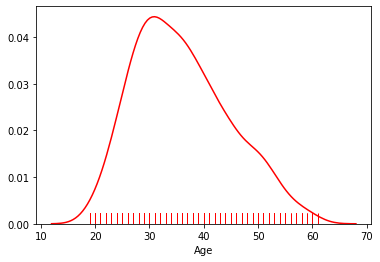

In [30]:
from scipy.stats import norm
sns.distplot(adv['Age'], hist=False, color='r', rug=True);

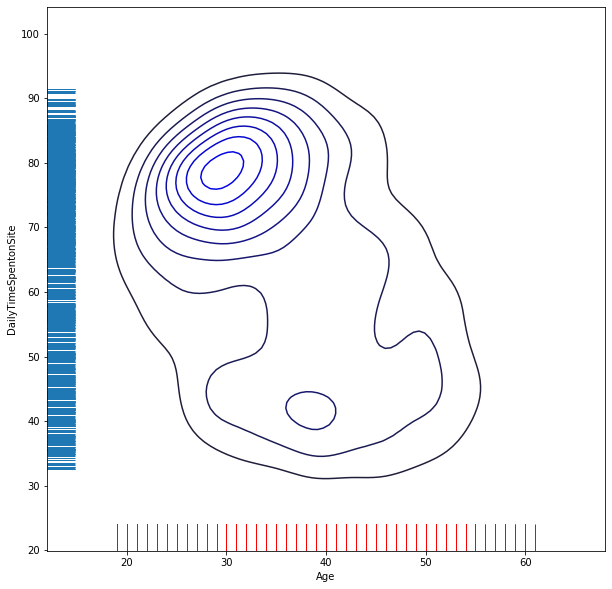

In [31]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(adv.Age, adv.DailyTimeSpentonSite, color="b", ax=ax)
sns.rugplot(adv.Age, color="r", ax=ax)
sns.rugplot(adv.DailyTimeSpentonSite, vertical=True, ax=ax)

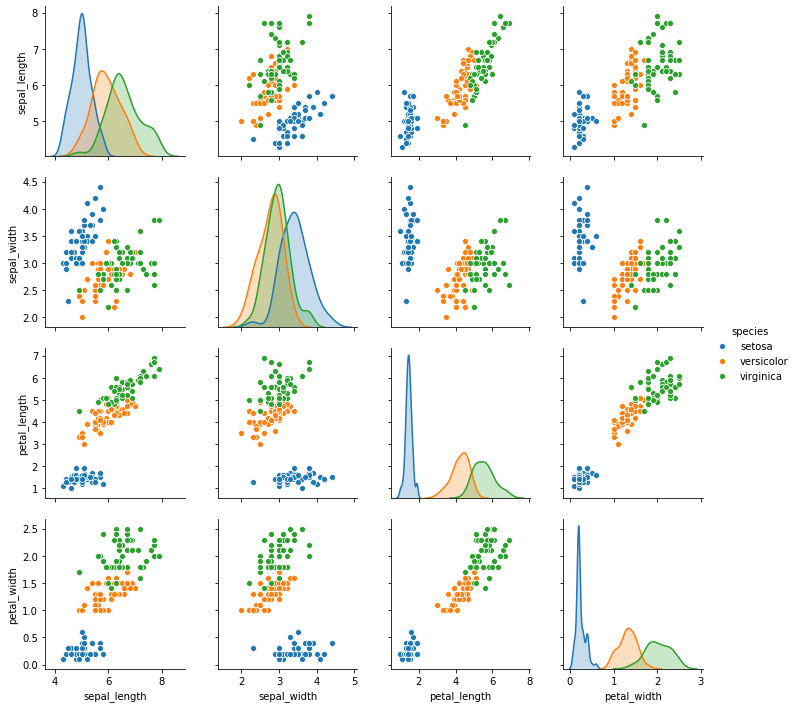

In [32]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff64b7bfd90>,
      dtype=object)

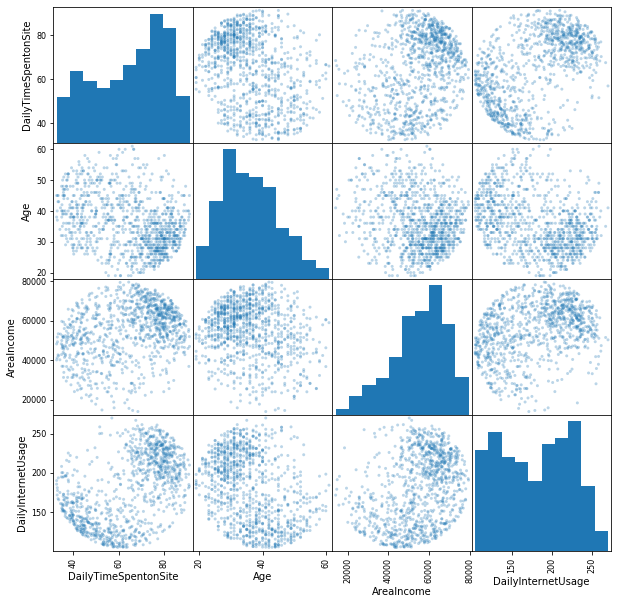

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(adv[['DailyTimeSpentonSite', 'Age','AreaIncome', 'DailyInternetUsage']], alpha=0.3, figsize=(10,10))

In [48]:
object_features = ['AdTopicLine', 'City', 'Country']
adv[object_features].describe(include=['O'])

,AdTopicLine,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Vision-oriented system-worthy forecast,Lisamouth,Czech Republic
freq,1,3,9


As we can see from the table above that all the values in column "Ad Topic Line" is unique, while the "City" column contains 969 unique values out of 1000. There are too many unique elements within these two categorical columns and it is generally difficult to perform a prediction without the existence of a data pattern. Because of that, they will be omitted from further analysis. The third categorical variable, i.e "Country", has a unique element (France) that repeats 9 times. Additionally, we can determine countries with the highest number of visitors:

The table below shows the 20 most represented countries in our DataFrame.

In [49]:
pd.crosstab(index=adv['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


We have already seen, there are 237 different unique countries in our dataset and no single country is too dominant. A large number of unique elements will not allow a model to establish valuable relationships. For that reason, this variable will be excluded too. It is too difficult to learn from (almost) flat distribution that is almost equivalent to white noise.

In [51]:
data = adv.drop(['AdTopicLine', 'City', 'Country'], axis=1)

Our purpose now is to create three new features because we are splitting one column in three columns. If we split features and properly operate on them we can get something useful. We are going to get two tipes for our feature: two with datetime, one with categorical. 

The "Day of the week" variable contains values from 0 to 6, where each number represents a specific day of the week (from Monday to Sunday). The categories here are the days of the week, which may be useful to detect periodic pattern in our data.

All the other variables are in dtime format.

1. convert the timestamp column (string format) into pandas datetime format
2. trought the dt accessor split time and date and day of the week and assign them to new columns
3. remove (drop) the timestamp column. There is no information loss here
4. check the output

In [52]:
adv['Timestamp'] = pd.to_datetime(adv['Timestamp'])

adv['WDay']  = adv['Timestamp'].dt.weekday
adv['Day']   = adv['Timestamp'].dt.date
adv['Hour']  = adv['Timestamp'].dt.time

In [53]:
adv = adv.drop(['Timestamp'], axis=1)

We can evaluate how much time our dataset spans

In [54]:
print('Train min/max date:', adv.Day.min(), adv.Day.max() )
print('Dataset time span: ',adv.Day.max()-adv.Day.min())

Train min/max date: 2016-01-01 2016-07-24
Dataset time span:  205 days, 0:00:00


First, one very simple histogram: which day f the week carry us more information? No one is more informative than the other: the plot is practically flat, meaning uniform sampling.

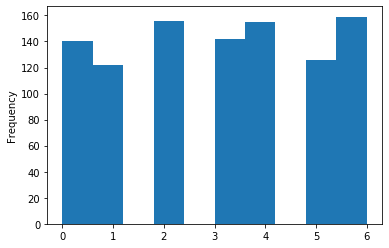

In [55]:
adv['WDay'].plot(kind='hist')

Trick: there is no direct way to visualize a dt.time column in a histogram format. But if we perform the right transformation of our data, we can easily visualize our data, even in a dirty format. Here what we want to obtain is just the shape of the distribution, something that can help us to decide how to proceed in our EDA.

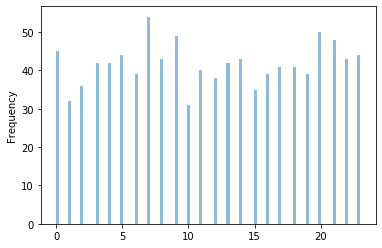

In [24]:
adv["NHour"] = adv["Hour"].astype(str)
adv['NHour'] = adv['NHour'].map(lambda x: int(x.replace(':','')))
adv["NHour"].plot.hist(bins=100, alpha=0.5)

Even if the plots are not informative, we can conclude that the sample is uniform and that we should do some feature engineering in order to extract meaningful informations.

# THE ART OF FEATURE DECODING: CASE STUDY 2

In the previous axemple we were working with data had a clear meaning. We knew what the features were and ment and data were given to us without particolar modifications. In daily life this setting is not the rule, but the exception: often data are algorithmically encoded in order to be anonymized.
If one data provider wants to anonymize geolocalization data it could replace the gps coordinates of each entry with hash values and so on

If the applied encoding is one-to-one the features are preserved and the models will be able to to learn.

### First of all, download the dataset:

In [ ]:
!wget https://habrastorage.org/storage/stuff/special/beeline/00.beeline_bigdata.zip

Feature names are replaced with some aliases x1, x2, ... and one can observe some hash values. This is a very common technique to anonymize data and this hide the information that need to be retrived. 

### First we can try to decode or de-anonymize data. 

Guessing the meaning of the data is allways a good starting point. Deanonymization is not allways possible but we can do this to reconstruct the type of the features, separating them in numeric, categorical ecc..



In [63]:
pd.set_option('max_columns', 100)

In [64]:
DATA_FOLDER = # your path here
anon_train = pd.read_csv(os.path.join(DATA_FOLDER, 'anon_train.csv'))
anon_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
0,b4d8a653ea,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,-0.688706,7e5c97705a,e5df3eff9b,91bb549494,e33c63cf35,3694.0,6e40247e69,617a4ad3f9,718c61545b,c26d08129a,634e3cf3ac,dd9c9e0da2,17c99905b6,513a3e3f36,9aba4d7f51,40.579612,-0.112693,-0.172191,1.166667,1.674538,0.630889,37.000000,1.294922,55.0,0.166667,10.0,0.0,0.000000,1.0,9.0,0.0,1.0,23.0,3.67,0.12,1.935,2.2,0.625,0.250,0.125,0.000,0.813,0.074,0.634,0.548,0.235333,0.264952,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,9.0,2
1,467f9617a3,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.870871,5624b8f759,fa0b797a92,669ea3d319,f178803074,18156.0,01ede04b4b,617a4ad3f9,718c61545b,d342e2765f,bb20e1ca06,8a6c8cef83,1b02793146,992153ed65,9aba4d7f51,28.765503,2.612285,2.159091,4.000000,1.710714,1.713538,0.166667,0.027669,109.0,0.000000,31.0,0.0,0.000000,1.0,244.0,1.0,1.0,68.0,17.25,0.57,3.452,4.0,0.409,0.619,0.579,0.248,0.346,0.541,0.522,0.000,1.782346,1.322409,0.011647,0.397671,0.239601,0.249584,0.068220,0.033278,601.0,4
2,190436e528,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.437655,5624b8f759,152af2cb2f,91bb549494,e33c63cf35,1178.0,cc69cbe29a,617a4ad3f9,e8a040423a,c82c3dbd33,ee3501282b,199ce7c484,5f17dedd5c,5c5025bd0a,9aba4d7f51,24.943933,-0.814660,-0.708308,1.500000,-0.512422,-0.733967,0.333333,14.837728,11.0,0.000000,24.0,0.0,0.000000,1.0,29.0,0.0,3.0,11.0,4.42,0.15,0.161,0.2,1.000,1.000,1.000,1.000,1.000,0.520,0.533,0.835,-0.586540,0.672436,0.000000,0.606061,0.121212,0.212121,0.060606,0.000000,33.0,3
3,43859085bc,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,0.004439,f67f142e40,c4dd2197c3,91bb549494,e33c63cf35,14559.0,6e40247e69,617a4ad3f9,718c61545b,c26d08129a,9e166b965d,466f8951b0,fde72a6d5c,acfadc5c01,9aba4d7f51,41.576860,-0.907833,-0.761736,0.500000,-0.627525,-0.805801,1.166667,0.004395,0.0,0.500000,0.0,0.0,0.000000,7.0,7.0,0.0,3.0,15.0,8.92,0.29,0.226,0.8,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,-1.600326,-1.838680,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,4
4,a4c3095b75,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.480977,7e5c97705a,e071d01df5,91bb549494,e33c63cf35,5777.0,6e40247e69,617a4ad3f9,4b9480aa42,e84655292c,527b6ca8cc,dd9c9e0da2,17c99905b6,0fc56ea1f0,9aba4d7f51,31.080282,-0.371787,-0.367616,1.666667,0.271307,0.013112,17.333333,1713.439128,33.0,0.000000,6.0,1.0,0.666667,8.0,108.0,1.0,4.0,86.0,1.58,0.05,2.032,2.4,0.348,0.762,0.550,0.392,0.489,0.517,1.000,0.642,0.960991,0.790990,0.020161,0.645161,0.258065,0.036290,0.040323,0.000000,248.0,3


this can help us to explore numeric fatures statistics.


In [65]:
anon_train.describe().T

,count,mean,std,min,25%,50%,75%,max
x6,50000.0,0.992960,0.083610,0.000000,1.000000,1.000000,1.000000,1.000000
x7,50000.0,0.975860,0.153485,0.000000,1.000000,1.000000,1.000000,1.000000
x8,48793.0,-0.000252,1.023282,-85.252444,-0.255490,0.221047,0.567620,3.426844
x13,45512.0,4428.915253,10943.884658,-99.000000,0.000000,1817.000000,5582.000000,776759.000000
x23,48122.0,35.961299,6.819859,15.226228,30.789115,36.597900,41.096434,135.063367
x24,48122.0,-0.006380,0.968346,-1.310465,-0.606190,-0.239545,0.284950,34.899154
x25,48122.0,-0.005182,0.947373,-0.817005,-0.540656,-0.223776,0.242333,38.146887
x26,48122.0,3.652688,3.427215,0.000000,1.333333,2.833333,5.000000,59.833333
x27,48122.0,0.006831,1.012709,-0.791959,-0.497977,-0.300303,0.133800,28.814227
x28,48122.0,0.002051,1.012566,-0.908422,-0.558758,-0.267042,0.246062,32.699880


Sometimes it's a good idea to introduce new features. We can understand something about the generation process of data fi we generate the following feature, that we will call Error. If in the row there are NaN the feature will be 1 otherwise 0.

In [66]:
anon_train['Error'] = anon_train.isna().any(axis=1)

# check how the new feature is distributed

false_count = (~anon_train.Error).sum()
print(false_count)
true_count = (anon_train.Error).sum()
print(true_count)

32761
17239


At least we have a feature that is known!

Since we do not know what all the rest of data are, we can try do build a quick baseline with a toy model. At the moment, we don't need to precisely know what the model does but if you care give look at:

https://en.wikipedia.org/wiki/Random_forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

The only thing we know about data is that the task they give us is a multiple classification. We can easily split the dataframe in features and target and use proper copies to work with. 

Never forget to fill the missing values! Here we are adopting an easy solution: we are filling then nans with an outlier value, but one could decide, if you are considering numerical features, tho fill it with the mean value. There is no limit to your immagination and what you can do. For example, if you want to drop your dataset you could fill all the features that you can and only in the last step remove the entries with missing values which, at this point, may be far less that the beginning. Obviously you introduced a bias in you rada and its on you to decide how to hande this kind of situation.

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Create a copy to work with
X = anon_train.copy()

# Save and drop labels
y = anon_train.y
X = X.drop('y', axis=1)

# fill NANs 
X = X.fillna(-999)

The factorize method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. We are encoding the target values in a manner tht is easy to interpretate for us and faster to process for the algorithm.

In [68]:
# Label encoder

for c in anon_train.columns[anon_train.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    
rf = RandomForestClassifier()
rf.fit(X,y)

/home/jacopo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Once the classifier is fitted it contains a data representation that we can investigate. Random forest allow a so friendly representation that is possible to plot. There will be less or more important features on which we will focus: in this case the most informative feature about our data is the X8:

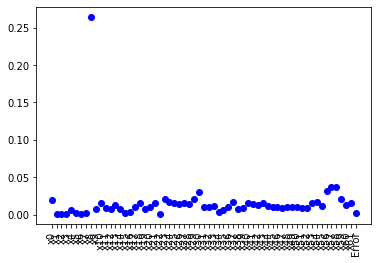

In [69]:
plt.plot(rf.feature_importances_,'bo')
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

Let's focus on the "most important feature", according to our baseline. We can easily check that is standard scaled. This scaling is only almost exact since the mean and the std are not exaclty 0 and 1; this could mean that the whole dataset (train adn test) was generated and then split. If true this could mean that we are allowed to overfit a little more than if train and test set were generated with different procedures. 

In [70]:
print( 'Mean:', anon_train.x8.mean())
print( 'Std:', anon_train.x8.std())

Mean: -0.00025235202862197324
Std: 1.023281636012582


Are there repeated values? Yes, a lot! The first 15 appear thousand of times each. This could mean that we are in front of an integer feature, shifted by a non integer constant.

In [72]:
anon_train.x8.value_counts().head(15)

-2.984750    2770
 0.480977    2569
 0.610941    1828
 0.654263    1759
 0.567620    1746
 0.697585    1691
 0.524298    1639
 0.740906    1628
 0.394333    1610
 0.437655    1513
 0.351012    1450
 0.264369    1429
 0.307690    1401
 0.221047    1372
 0.784228    1293
Name: x8, dtype: int64

The original feature was multiplied by a number and then shifted. We already understood that this shift is not an integer and that the variable is likely to be integer. 

We can formalize our intuition as follows:
Let be $X$ the (standard scaled) feature we want to scale back. Our hypothesis is that the original feature $Z$ can be obtained from the current with the transformation:

$ Z = \mu + \sigma X = <Z> + \sigma_Z X$

Now our aim is to obtain $<Z>$ and $ \sigma_Z $, we will do it by an ansatz solution.
So far, the two quantities follow two normal distribution, with different parameters:

$$ X \sim N(0,1) \quad Z \sim N(\mu,\sigma)$$

First we sort the array of unique values of $X$.
If we print the difference between two consecutive entries we can imediately notice that the difference is a constant, that was the same in the original data too.
It was probably not 0.043 something, it could be 9 or 11 or 11.7, but it was the same between all the pairs, and our ansatz is that it was 1.
If we divide our feature by this number, we see that the differences become close to 1.

In [74]:
x8_unique = anon_train.x8.unique()
x8_unique_sorted = np.sort(x8_unique)
                           
np.diff(x8_unique_sorted)

array([43.27826527, 38.98942817,  0.21660793,  0.04332159,  0.17328635,
        0.21660793,  0.08664317,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04332159,
        0.04332159,  0.04332159,  0.04332159,  0.04332159,  0.04

In [75]:
np.diff(x8_unique_sorted/0.04332159)

array([998.99992752, 899.9999347 ,   4.99999964,   0.99999993,
         3.99999971,   4.99999964,   1.99999985,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99999993,
         0.99999993,   0.99999993,   0.99999993,   0.99

 if we divide our features for 0.43.. this is what we get
 we can see that all the number ends with the same digits, x.102469 for positive values 
 and about -x.897526 for negative values


In [76]:
(anon_train.x8/0.04332159).head(8)

0   -15.897530
1    20.102468
2    10.102468
3     0.102469
4    11.102468
5   -68.897526
6    10.102468
7    15.102468
Name: x8, dtype: float64

subtracting the fractional part our features will be almost integers

In [77]:
(anon_train.x8/0.04332159 - .102468).head(10)

0   -15.999998
1    20.000000
2    10.000000
3     0.000001
4    11.000000
5   -68.999994
6    10.000000
7    15.000000
8     9.000000
9   -68.999994
Name: x8, dtype: float64

In [78]:
# round them

x8_int = (anon_train.x8/0.04332159 - .102468).round()
x8_int.head(10)

0   -16.0
1    20.0
2    10.0
3     0.0
4    11.0
5   -69.0
6    10.0
7    15.0
8     9.0
9   -69.0
Name: x8, dtype: float64

At this stage we found only the fractional part of the variable $Z$
Can we find the integer part? It is not obvious how to proceed but we can improve our intuition about the ansatz (hypothesis to buil) with further exploration

In [79]:
x8_int.value_counts()

-69.0    2770
 11.0    2569
 14.0    1828
 15.0    1759
 13.0    1746
         ... 
 42.0       1
-63.0       1
-48.0       1
-64.0       1
 35.0       1
Name: x8, Length: 99, dtype: int64

If we scroll down we will see this, -1968 and it definitely looks like year a of birth. 
Immediately I have a hypothesis, that this could be a text box where a person should enter his year of birth. We have been guided by mathematics but giving a look the the data values and with a spark of fantasy one can get a reasonable hypothesis.
In this entry something wrong happened and the data recording system set a default/error value. So be carefoul with dropping outliers, because they can be the keays to leak your data!

And wow, that isn't the key.
If we assume the value was originally 0, then the shifting parameter is exactly 1968, let's try it. The outlier remain an outlier but now all the pther values are properly shifted and it's clear that X8 it's a year birth!

In [80]:
(x8_int + 1968.0).value_counts().sort_index()

0.0          1
999.0        4
1899.0    2770
1904.0       1
1905.0       1
          ... 
2005.0       2
2010.0       1
2037.0       1
2038.0       1
2047.0       1
Name: x8, Length: 99, dtype: int64

## Something more about decoding

The best we can do is to recognize the type of the features.
Is it categorical, numeric, text, or something else?
Each data type should be treated differently,and more treatment depends on the model we want to use. That is why to make a stronger model, we should know what data we are working with. Even though we cannot understand what the features are about, we should at least detect the types of variables in the data.

When the number of columns in data set is small, we can just consider the table, and manually sort the types out. But, what if there are thousand of features in the data set? Pandas offers very useful functions to facilitate our exploration, such as function dtypes that guesses the types for each column in the data frame and sorts the columns according to its guess. The outcome may be four-fold: 

* float64 for numeric data
* int64 for categorical or event counting
* datatime64 for time features
* object for strings, text ecc...

In [81]:
anon_train.dtypes

x0        object
x1        object
x2        object
x3        object
x4        object
          ...   
x59      float64
x60      float64
x61      float64
y          int64
Error       bool
Length: 64, dtype: object

The truth is that object is quite problematic. We recommend to look directly into your column to improve yous ansatzs.
Be careful! The dtype returned by this function can be in contrast with the dtype guessed by dtypes

In [82]:
anon_train.x0.value_counts()

aa2f3cd34a    13090
cc73658409     3006
467f9617a3     1588
65d757ad7d     1523
bfff7d2d9e     1523
              ...  
e6b51a9c15       18
d4d4b9c606       11
6ea3724cfa       10
e2f6f3422c        5
6e38793f2b        2
Name: x0, Length: 85, dtype: int64

In [83]:
anon_num = anon_train.select_dtypes(include=['float64'])

In [84]:
anon_num.shape

(50000, 41)

Sometimes it may be important to detect the feature with the highest mean value or investigate, who knows, the features with the first three or four highest mean value. Let's try with the one with the highest:

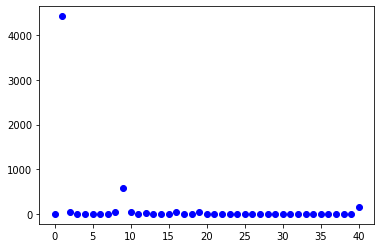

In [94]:
num_feature_mean = np.array( anon_num.mean() )
num_feature_id   = np.array( range( 41 ) )

plt.plot(feature_id,feature_mean,'bo')

In [102]:
average = dict(zip(num_feature_mean,num_feature_id))

avg = np.sort(num_feature_mean)
avg = avg[::-1]

mu = {}

for i in range(avg.shape[0]):
    
    mu[average[avg[i]]] = avg[i]

print(mu)

{1: 4428.915253120056, 9: 579.8522041815261, 40: 161.14391015912935, 16: 49.56753667761107, 10: 43.258414243519944, 8: 42.403973234695506, 2: 35.96129898816198, 19: 34.22134618850243, 12: 12.779809650471718, 20: 6.597967877094929, 5: 3.652688306110872, 15: 3.571173267943976, 18: 2.4630730227338846, 23: 1.3200735724437265, 22: 1.2202181882786383, 17: 0.7708324674784922, 24: 0.5405414263021449, 25: 0.5213348800267512, 26: 0.5046190117883088, 27: 0.47032729286848296, 29: 0.4643052629378774, 31: 0.4642925131677977, 30: 0.4618370955605715, 28: 0.4604432321712223, 13: 0.4374298657578654, 11: 0.38960420043500094, 35: 0.298044466094258, 36: 0.2860404443012271, 14: 0.27723702256763955, 21: 0.2168922328347537, 37: 0.20155726643545605, 38: 0.1165783303124601, 39: 0.05123354838521274, 34: 0.04632493988543323, 6: 0.006830594924892294, 7: 0.0020509575188448837, 0: -0.00025235202862197324, 32: -0.0006858238223447618, 33: -0.003265624204077573, 4: -0.005181671639822081, 3: -0.006380185710827436}


This sorting show us that there are few (3) features with high mean value and most of the oters are not higher that 10. We may investigate the first two

In [107]:
magic1 = 1
print(magic1)

imp1 = rf.feature_importances_

print(imp[magic1])

1
0.0010622264382784572


In [108]:
anon_num.head()

,x8,x13,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,-0.688706,3694.0,40.579612,-0.112693,-0.172191,1.166667,1.674538,0.630889,37.000000,1.294922,55.0,0.166667,10.0,0.0,0.000000,1.0,9.0,0.0,1.0,23.0,3.67,0.12,1.935,2.2,0.625,0.250,0.125,0.000,0.813,0.074,0.634,0.548,0.235333,0.264952,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,9.0
1,0.870871,18156.0,28.765503,2.612285,2.159091,4.000000,1.710714,1.713538,0.166667,0.027669,109.0,0.000000,31.0,0.0,0.000000,1.0,244.0,1.0,1.0,68.0,17.25,0.57,3.452,4.0,0.409,0.619,0.579,0.248,0.346,0.541,0.522,0.000,1.782346,1.322409,0.011647,0.397671,0.239601,0.249584,0.068220,0.033278,601.0
2,0.437655,1178.0,24.943933,-0.814660,-0.708308,1.500000,-0.512422,-0.733967,0.333333,14.837728,11.0,0.000000,24.0,0.0,0.000000,1.0,29.0,0.0,3.0,11.0,4.42,0.15,0.161,0.2,1.000,1.000,1.000,1.000,1.000,0.520,0.533,0.835,-0.586540,0.672436,0.000000,0.606061,0.121212,0.212121,0.060606,0.000000,33.0
3,0.004439,14559.0,41.576860,-0.907833,-0.761736,0.500000,-0.627525,-0.805801,1.166667,0.004395,0.0,0.500000,0.0,0.0,0.000000,7.0,7.0,0.0,3.0,15.0,8.92,0.29,0.226,0.8,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,-1.600326,-1.838680,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,0.480977,5777.0,31.080282,-0.371787,-0.367616,1.666667,0.271307,0.013112,17.333333,1713.439128,33.0,0.000000,6.0,1.0,0.666667,8.0,108.0,1.0,4.0,86.0,1.58,0.05,2.032,2.4,0.348,0.762,0.550,0.392,0.489,0.517,1.000,0.642,0.960991,0.790990,0.020161,0.645161,0.258065,0.036290,0.040323,0.000000,248.0


(-99.0, 30000)

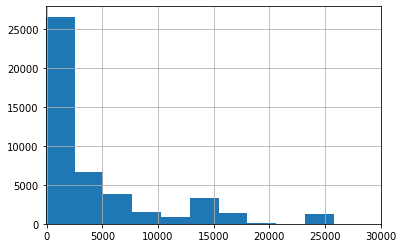

In [109]:

magic_feature = anon_num['x13']

magic_hist = magic_feature.hist(bins=300)
magic_hist.set_xlim((anon_train.x13.min(),30000))


#magic_hist = anon_train.x13.hist(bins=300)
#magic_hist.set_xlim((anon_train.x13.min(),30000))


# Some good practices: CASE STUDY 3 (very brief)

We can still get higher confidence with pandas, using it as if were a data base. 
Here we are going to see an example of how to build a query in pandas.
First of all, download the dataset:

https://www.kaggle.com/c/competitive-data-science-final-project/data

And encode it with pandas dataframes.

In [110]:
DATA_FOLDER = '/home/jacopo/Desktop/MLJC/PROX/FILES/Notebooks/jovyan/readonly/final_project_data'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

### What was the maximum total revenue among all the shops in September, 2014? Hereinafter *revenue* refers to total sales minus value of goods returned.

Track of the solution:

Sometimes items are returned, find such examples in the dataset. 

It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.

You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

Given the hints we can translate our reasoning into code!

First we change date format to datetime. Doing this we will be able to better handle the data.
The next step is the splitting procedure: from one original features we create three new ones and then drop the old.


In [111]:
transactions["date"] = pd.to_datetime(transactions["date"],format = "%d.%m.%Y")

transactions["year"] = transactions.date.dt.year
transactions["month"] = transactions.date.dt.month
transactions["day"] = transactions.date.dt.day

transactions.drop('date', axis=1, inplace=True)

The second step is to create an object where we save only what we want to investigate further.
Again we are redefining our feature. We are defining its entries trough a lambda function.

In [112]:
shortlist = transactions[(transactions.year == 2014) & (transactions.month == 9)]
shortlist = shortlist.assign(dailygain = lambda x: x.item_cnt_day * x.item_price)

Now we store our target feature in a numpy array, and will find the maximum

In [113]:
revenuelist = np.array([])

for i in shortlist.shop_id:
    revenuelist = np.append(revenuelist,shortlist[(shortlist.shop_id == i)].dailygain.sum())
    

max_revenue = revenuelist.max()

print(max_revenue)


7982852.199999956


# Dataset cleaning: CASE STUDY 4

The basic idea here is to think to our dataset as a big table. In this table it may happen that some information is just a plus, and this can happen in several ways. 
We have already checked one. In our first real case we spotted some practically constant features and decided to remove them because equally distributed features means noise something that, in principle we would like to avoid.
The second thing that may help us to decide how to clean the dataset are the identical features. This may happen if the data provider made some errors in the dataset design and/or sampling. If two features are identical we can drop one of them without loss of information.
Another important thing that may happen is that the dataset needs to be filled. There may be a lot of missing entries (considered as single values). We can choose serveral quality criteria.

for example:
$MV \rightarrow \textit{fraction of missing values}$
* $ 0 < MV < 0.3 $ Fill missing values with something meaningful, eg the mean value
* $ 0.3 < MV < 0.5 $ Convert those features in categorical ones
* $ MV > 0.5 $ Directly drop such features

Another important thing to do good EDA is the dataset cleaning and check if data are properly shuffled. This is important if we want to perform solid statistical test on our data.

It may happens that, to prove our capability to handle data, someone give a us feature that takes allways (or almost) the same value both in train and test set. For example the feature may be a day of the year and, if the dataset were sampled only in one day the feature appears to be just a constant. It can be a good choice to drop this feature to gain some computational memory and do not dirt the representation of data that our model will build. Before doing that we shold consider the case where the fature is constant in the train set but it is not in the test set. To remove the constant feature is still a good choice at all, since, if our model bases a portion of its prediction on this features those portion will be completely unreliable or, in the ML language the model will not generalize.

Let's consider the reverse situation, where some values appear only in the train set and not in the test. We have to decide those particular values are important to build our hypothesis. A standard procedure in this case, if data are large enough, is to split from the train a subset for the validation where those values are exluded and see the performance of our model. One this is done we can consider to remove the feature or to let our model process those feature in a different way.

It may happen that two features are completeley identical. We can remove one of those two columns, since the second does not contribute to information gain and slows down model training. This is easy to do for numeric features where we can do an element-wise comparison. We may have duplicated categorical features. How do we find them?

We can start with the dtypes and choose only the categorical (often the int64, but be careful) and store their name in an iterable object, categrocial_features here.

The most important part here is label encoding, that need do be done properly. Suppose we have two categorical features, f1 and f2. If we choose to encode the first unique value with 1, the second with 2 and so on we can detect if they are equal. 

### Download the dataset

https://www.kaggle.com/c/springleaf-marketing-response/data

In [2]:
DATA_FOLDER = # your path here

train = pd.read_csv(os.path.join(DATA_FOLDER,'leaf_train.csv'))
test  = pd.read_csv(os.path.join(DATA_FOLDER,'leaf_test.csv'))

/home/jacopo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jacopo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9,10,11,12,43,157,167,177,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
print('Train shape', train.shape)
print('Test shape',  test.shape)

Train shape (5000, 1934)
Test shape (5000, 1933)


In [3]:
set_size = int(5e3)

train = train[:set_size]
test = test[:set_size]
print(train.shape)
print(test.shape)

(5000, 1934)
(5000, 1933)


In [4]:
Y = train.target
test_ID = test.ID

In [5]:
train.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [6]:
test.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934
0,1,R,360,25,2251,B,2.0,2.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
1,3,R,74,192,3274,C,2.0,3.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
2,6,R,21,36,3500,C,1.0,1.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
3,9,R,8,2,1500,B,0.0,0.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
4,10,H,91,39,84500,C,8.0,3.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS


There are almost 2000 anonymized variables! It's clear, some of them are categorical, some look like numeric. Some numeric feateures are integer typed, so probably they are event conters or dates. And others are of float type, but from the first few rows they look like integer-typed too, since fractional part is zero, but pandas treats them as `float` since there are NaN values in that features.   

From the first glance we see train has one more column `target` which we should not forget to drop before fitting a classifier. We also see `ID` column is shared between train and test, which sometimes can be succesfully used to improve the score.

It is also useful to know if there are any NaNs in the data. You should pay attention to columns with NaNs and the number of NaNs for each row can serve as a nice feature later.

In [67]:
# Number of NaNs for each object
nan_list = np.array(train.isnull().sum(axis=1))

# we can easily obtain the missing value percentage of our dataset
nan_perc = np.sum(nan_list)/(train.shape[0]*train.shape[1])
print('Missing values are ',nan_perc,'% of the whole')

print(nan_list)
print(np.max(nan_list),np.argmax(nan_list))

Missing values are  0.00591266149870801 % of the whole
[11  6 10 ... 10 10 11]
289 1528


(array([ 883., 4079.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   38.]),
 array([  3.  ,   8.72,  14.44,  20.16,  25.88,  31.6 ,  37.32,  43.04,
         48.76,  54.48,  60.2 ,  65.92,  71.64,  77.36,  83.08,  88.8 ,
         94.52, 100.24, 105.96, 111.68, 117.4 , 123.12, 128.84, 134.56,
        140.28, 146.  , 151.72, 157.44, 163.16, 168.88, 174.6 , 180.32,
        186.04, 191.76, 197.48, 203.2 , 208.92, 214.64, 220.36, 226.08,
        231.8 , 237.52, 243.24, 248.96, 254.68, 260.4 , 266.12, 271.84,
        277.56, 283.28, 289.  ]),
 <a list of 50 Patch objects>)

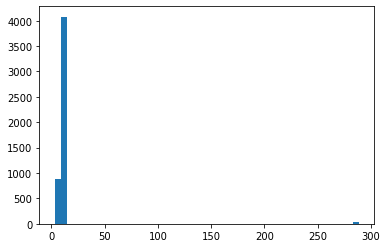

In [68]:
plt.hist(nan_list,bins=50)

From here we can see that most of the dataset features are completely filled. 

In [7]:
# Number of NaNs for each column
train.isnull().sum(axis=0).head(5)

ID          0
VAR_0001    0
VAR_0002    0
VAR_0003    0
VAR_0004    0
dtype: int64

All 1932 columns are anonimized which makes us to deduce the meaning of the features ourselves. We will now try to clean the dataset. 

It is usually convenient to concatenate train and test into one dataframe and do all feature engineering using it.

In [18]:
traintest = pd.concat([train, test], axis = 0)
print(traintest.shape)

/home/jacopo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(10000, 1934)


First we schould look for a constant features, such features do not provide any information and only make our dataset larger. 

In [ ]:
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = train.nunique(dropna = False)

In [ ]:
feats_counts.sort_values()[:10]

We found 5 constant features. The idea here is to translate what we found in a list and then use the drop method `loc()` method is used to access a group of rows and columns by label(s) or a boolean array.

In [18]:
constant_features = feats_counts.loc[feats_counts==1].index.tolist()
print (constant_features)


traintest.drop(constant_features,axis = 1,inplace=True)

['VAR_0008', 'VAR_0009', 'VAR_0010', 'VAR_0011', 'VAR_0012', 'VAR_0018', 'VAR_0019', 'VAR_0020', 'VAR_0021', 'VAR_0022', 'VAR_0023', 'VAR_0024', 'VAR_0025', 'VAR_0026', 'VAR_0027', 'VAR_0028', 'VAR_0029', 'VAR_0030', 'VAR_0031', 'VAR_0032', 'VAR_0038', 'VAR_0039', 'VAR_0040', 'VAR_0041', 'VAR_0042', 'VAR_0043', 'VAR_0044', 'VAR_0106', 'VAR_0188', 'VAR_0189', 'VAR_0190', 'VAR_0191', 'VAR_0192', 'VAR_0193', 'VAR_0196', 'VAR_0197', 'VAR_0199', 'VAR_0202', 'VAR_0203', 'VAR_0207', 'VAR_0213', 'VAR_0214', 'VAR_0215', 'VAR_0216', 'VAR_0221', 'VAR_0222', 'VAR_0223', 'VAR_0229', 'VAR_0239', 'VAR_0840', 'VAR_0847', 'VAR_1428']


## Remove duplicated features.

Fill the NAN values. Since our datasets are very large we need to do a piece-wise cleaning. Otherwise the kernel may die.

In [14]:
w = 100

for i in range(int(set_size/w)):
    train[i*w:(i+1)*w].fillna('NaN', inplace=True)
    test[i*w:(i+1)*w].fillna('NaN', inplace=True)

In [16]:
from tqdm import tqdm_notebook

Now let's encode each feature

In [19]:
train_enc =  pd.DataFrame(index = train.index)

for col in tqdm_notebook(traintest.columns):
    train_enc[col] = train[col].factorize()[0]

In [20]:
print(train.shape)
print(test.shape)

(5000, 1934)
(5000, 1933)


The resulting data frame is very very large, so we cannot just transpose it and use `.duplicated`. That is why we will use a simple loop. This step may take some time, have a coffe!

In [21]:
dup_cols = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(train_enc[c1] == train_enc[c2]):
            dup_cols[c2] = c1

In [22]:
dup_cols

{'VAR_0227': 'ID',
 'VAR_0228': 'ID',
 'VAR_0013': 'VAR_0006',
 'VAR_0009': 'VAR_0008',
 'VAR_0010': 'VAR_0008',
 'VAR_0011': 'VAR_0008',
 'VAR_0012': 'VAR_0008',
 'VAR_0018': 'VAR_0008',
 'VAR_0019': 'VAR_0008',
 'VAR_0020': 'VAR_0008',
 'VAR_0021': 'VAR_0008',
 'VAR_0022': 'VAR_0008',
 'VAR_0023': 'VAR_0008',
 'VAR_0024': 'VAR_0008',
 'VAR_0025': 'VAR_0008',
 'VAR_0026': 'VAR_0008',
 'VAR_0027': 'VAR_0008',
 'VAR_0028': 'VAR_0008',
 'VAR_0029': 'VAR_0008',
 'VAR_0030': 'VAR_0008',
 'VAR_0031': 'VAR_0008',
 'VAR_0032': 'VAR_0008',
 'VAR_0038': 'VAR_0008',
 'VAR_0039': 'VAR_0008',
 'VAR_0040': 'VAR_0008',
 'VAR_0041': 'VAR_0008',
 'VAR_0042': 'VAR_0008',
 'VAR_0043': 'VAR_0008',
 'VAR_0044': 'VAR_0008',
 'VAR_0106': 'VAR_0008',
 'VAR_0188': 'VAR_0008',
 'VAR_0189': 'VAR_0008',
 'VAR_0190': 'VAR_0008',
 'VAR_0191': 'VAR_0008',
 'VAR_0192': 'VAR_0008',
 'VAR_0193': 'VAR_0008',
 'VAR_0196': 'VAR_0008',
 'VAR_0197': 'VAR_0008',
 'VAR_0199': 'VAR_0008',
 'VAR_0202': 'VAR_0008',
 'VAR_0203':

Don't forget to save them, as it takes long time to find these.

Drop from the dataset

In [25]:
traintest.drop(dup_cols.keys(), axis = 1,inplace=True)

## Determine types

In [26]:
nunique = train.nunique(dropna=False)
nunique

ID          5000
VAR_0001       3
VAR_0002     456
VAR_0003     385
VAR_0004    1929
            ... 
VAR_1931       9
VAR_1932      17
VAR_1933     154
VAR_1934       5
target         2
Length: 1934, dtype: int64

And build an histrogam of those values

Let's take a looks at the features with a huge number of unique values:

In [28]:
mask = (nunique.astype(float)/train.shape[0] > 0.8)
train.loc[:, mask]

,ID,VAR_0212,VAR_0227,VAR_0228,VAR_0541,VAR_0543,VAR_0704,VAR_0887,VAR_0899,VAR_1081,VAR_1082,VAR_1087,VAR_1179,VAR_1180,VAR_1181,VAR_1495
0,2,NaN,311951.0,311951.0,49463,116783,25619,19214,112871,76857,76857,116783,76857,76857,76857,50000
1,4,9.207125e+10,2769488.0,2769488.0,303472,346196,28336,28336,346375,341365,341365,346196,341365,341365,176604,27542
2,5,2.654775e+10,654127.0,654127.0,94990,122601,35589,35589,121501,107267,107267,121501,107267,107267,58714,19238
3,7,7.757535e+10,3015088.0,3015088.0,20593,59490,5854,5204,61890,45794,47568,59490,45794,47568,47568,29182
4,8,6.042377e+10,118678.0,118678.0,10071,35708,2550,2266,34787,20475,23647,34708,20475,23647,23647,23932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9725,3.202406e+10,2913739.0,2913739.0,50054,89996,16555,16555,92321,81099,81099,89996,81099,81099,42321,21348
4996,9730,NaN,1713017.0,1713017.0,227,1000,342,342,500,227,227,1000,227,227,227,2647
4997,9736,2.454042e+10,1564676.0,1564676.0,13943,15343,3844,3844,19193,14444,14959,15193,14444,14959,14959,13943
4998,9738,2.973045e+10,2400564.0,2400564.0,440,726,577,577,4290,505,505,726,505,505,505,440


The values are not float, they are integer, so these features are likely to be even counts. Let's look at another pack of features.

In [29]:
mask = (nunique.astype(float)/train.shape[0] < 0.8) & (nunique.astype(float)/train.shape[0] > 0.4)
train.loc[:25, mask]

,VAR_0200,VAR_0241,VAR_0293,VAR_0313,VAR_0585,VAR_0609,VAR_0648,VAR_0649,VAR_0652,VAR_0705,...,VAR_1374,VAR_1489,VAR_1494,VAR_1496,VAR_1497,VAR_1801,VAR_1802,VAR_1809,VAR_1810,VAR_1859
0,FT LAUDERDALE,33324.0,0.0,0.0,48233,73627,999999997,999999996,999999996,49463,...,39926,999999997,999999997,999999997,999999997,49463,49463,30537,30537,999999997
1,SANTEE,92071.0,163400.0,163400.0,2407,3502,26051,2805,2625,798,...,2847,32597,33667,27542,11222,5296,5296,2847,2847,2684
2,REEDSVILLE,26547.0,0.0,0.0,999999997,999999997,10161,2116,7071,-99999,...,999999997,12277,22523,15452,11262,999999997,999999997,999999997,999999997,999999997
3,LIBERTY,77575.0,0.0,0.0,236,1903,20593,18802,29182,183,...,14,45508,59190,29182,9865,286,2060,14,14,1774
4,FRANKFORT,60423.0,0.0,0.0,6183,6693,10071,10071,20947,1918,...,3357,10071,20947,20947,20947,10404,13576,3357,3357,568
5,SPRING,77379.0,127200.0,127200.0,412,412,18877,1025,4000,692,...,88,19902,26755,22755,13378,1237,1237,88,88,999999998
6,GRESHAM,97030.0,252970.0,252970.0,999999996,999999996,5818,5818,23665,116,...,157,5818,23665,23665,23665,143,143,157,157,999999997
7,WARNER ROBINS,31098.0,0.0,0.0,999999996,999999996,2961,1015,1544,219,...,150,3976,4681,3137,2341,350,350,150,150,1365
8,SAN ANTONIO,78212.0,68120.0,0.0,999999996,999999996,20359,820,3048,412,...,308,23389,28314,21942,5663,1580,3739,308,308,5209
9,NORRISTOWN,19401.0,0.0,0.0,362,1127,999999996,999999996,999999996,-99999,...,118,999999996,999999996,999999996,999999996,1197,1197,118,118,815


These look like counts too. First thing to notice is the 23th line: 99999.., -99999 values look like NaNs so we should probably built a related feature. Second: the columns are sometimes placed next to each other, so the columns are probably grouped together and we can disentangle that.  
Our conclusion: there are no floating point variables, there are some counts variables, which we will treat as numeric. 

And finally, let's pick one variable (in this case 'VAR_0015') from the third group of features.

In [30]:
train['VAR_0015'].value_counts()

0.0     3595
1.0      936
2.0      294
3.0       94
4.0       38
5.0       21
6.0       12
7.0        4
8.0        2
10.0       2
14.0       1
9.0        1
Name: VAR_0015, dtype: int64

In [31]:
cat_cols = list(train.select_dtypes(include=['object']).columns)
num_cols = list(train.select_dtypes(exclude=['object']).columns)

Replace Nan

In [33]:
train.replace('NaN', -999, inplace=True)

Let's calculate how many times one feature is greater than the other and create cross tabel out of it. 

In [74]:
feats = num_cols[:42]

Indeed, we see interesting patterns here. There are blocks of features where one is strictly greater than the other. So we can hypothesize, that each column correspondes to cumulative counts, e.g. feature number one is counts in first month, second -- total count number in first two month and so on. So we immediately understand what features we should generate to make tree-based models more efficient: the differences between consecutive values.

# VAR_0002, VAR_0003

(array([1.152e+03, 8.430e+02, 3.940e+02, 5.610e+02, 3.610e+02, 2.280e+02,
        2.720e+02, 2.560e+02, 1.300e+02, 1.160e+02, 1.110e+02, 6.000e+01,
        7.700e+01, 4.400e+01, 3.400e+01, 5.100e+01, 1.900e+01, 2.100e+01,
        3.700e+01, 2.700e+01, 1.800e+01, 2.100e+01, 2.000e+01, 1.500e+01,
        2.200e+01, 2.000e+01, 5.000e+00, 4.000e+00, 5.000e+00, 3.000e+00,
        6.000e+00, 9.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.700e+01]),
 array([  0.  ,  19.98,  39.96,  59.94,  79.92,  99.9 , 119.88, 139.86,
        159.84, 179.82, 199.8 , 219.78, 239.76, 259.74, 279.72, 299.7 ,
        319.68, 339.66, 359.64, 379.62, 399.6 , 419.58, 439.56, 459.54,
        479.52, 499.5 , 519.48, 539.46, 559.44, 579.42, 599.4 , 619.38,
        639.36, 659.34, 679.32, 699.3 , 719.28, 739.26, 759.24, 779.22,
        799.2 , 

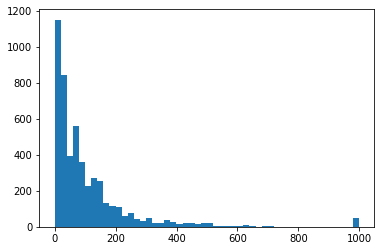

In [53]:
plt.hist(train['VAR_0002'],bins=50)

(array([1.426e+03, 6.620e+02, 4.670e+02, 6.310e+02, 3.480e+02, 2.160e+02,
        2.440e+02, 2.370e+02, 1.290e+02, 1.190e+02, 9.700e+01, 6.900e+01,
        5.800e+01, 5.500e+01, 2.800e+01, 3.200e+01, 3.100e+01, 1.300e+01,
        2.400e+01, 2.100e+01, 1.300e+01, 9.000e+00, 5.000e+00, 5.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.900e+01]),
 array([  0.  ,  19.98,  39.96,  59.94,  79.92,  99.9 , 119.88, 139.86,
        159.84, 179.82, 199.8 , 219.78, 239.76, 259.74, 279.72, 299.7 ,
        319.68, 339.66, 359.64, 379.62, 399.6 , 419.58, 439.56, 459.54,
        479.52, 499.5 , 519.48, 539.46, 559.44, 579.42, 599.4 , 619.38,
        639.36, 659.34, 679.32, 699.3 , 719.28, 739.26, 759.24, 779.22,
        799.2 , 

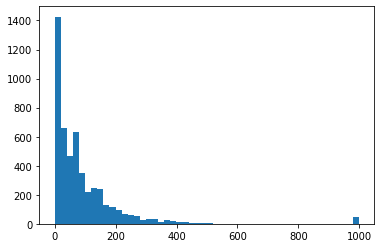

In [54]:
plt.hist(train['VAR_0003'],bins=50)

In [37]:
train['VAR_0002'].value_counts()

12     167
24     157
36     129
13     103
60     103
      ... 
828      1
760      1
704      1
684      1
235      1
Name: VAR_0002, Length: 456, dtype: int64

In [38]:
train['VAR_0003'].value_counts()

0      568
24     118
12     112
60     112
36      82
      ... 
371      1
385      1
397      1
603      1
405      1
Name: VAR_0003, Length: 385, dtype: int64

We see there is something special about 12, 24 and so on, sowe can create another feature x mod 12. 

(array([1065.,  230.,    0.,  301.,    0.,  240.,    0.,  870.,    0.,
         224.,  304.,    0.,  227.,    0.,  822.,    0.,  198.,    0.,
         304.,  215.]),
 array([ 0.  ,  0.55,  1.1 ,  1.65,  2.2 ,  2.75,  3.3 ,  3.85,  4.4 ,
         4.95,  5.5 ,  6.05,  6.6 ,  7.15,  7.7 ,  8.25,  8.8 ,  9.35,
         9.9 , 10.45, 11.  ]),
 <a list of 20 Patch objects>)

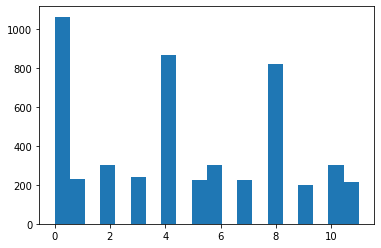

In [76]:
train['VAR_0004_mod12'] = train['VAR_0004'] % 12

plt.hist(train['VAR_0004_mod12'],bins=20)


# VAR_0004

(array([2027.,   52.,   55.,   50.,   86.,   74.,   72.,   42.,   51.,
          34.,   98.,   41.,   57.,   40.,   64.,   73.,   48.,   33.,
          55.,   53.,  104.,   65.,   90.,   62.,   51.,   87.,   48.,
          52.,   47.,   54.,  107.,   54.,   58.,   45.,   43.,   50.,
          69.,   68.,   70.,   56.,  107.,   47.,   61.,   47.,   62.,
          51.,   66.,   60.,   70.,   44.]),
 array([ 0.  ,  0.98,  1.96,  2.94,  3.92,  4.9 ,  5.88,  6.86,  7.84,
         8.82,  9.8 , 10.78, 11.76, 12.74, 13.72, 14.7 , 15.68, 16.66,
        17.64, 18.62, 19.6 , 20.58, 21.56, 22.54, 23.52, 24.5 , 25.48,
        26.46, 27.44, 28.42, 29.4 , 30.38, 31.36, 32.34, 33.32, 34.3 ,
        35.28, 36.26, 37.24, 38.22, 39.2 , 40.18, 41.16, 42.14, 43.12,
        44.1 , 45.08, 46.06, 47.04, 48.02, 49.  ]),
 <a list of 50 Patch objects>)

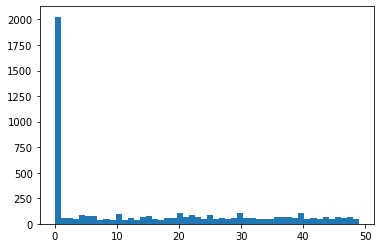

In [75]:
train['VAR_0004_mod50'] = train['VAR_0004'] % 50
plt.hist(train['VAR_0004_mod50'],bins=50)

## FURTHER DEVELOPMENTS:

### Outliers

If EDA is an art outlier handling is its natural partner. It is a very rich and difficult topic that every data science should be able to deal with. 


### Dataset Balancing

Is  sampling purely random or are there oversampled classes/cluster? Another helpful manipulation could be dataset balancing eg with data augmentation. Understanding how a dataset is generated is crucial to set up a propre validation scheme.



# References:


https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

https://www.coursera.org/lecture/competitive-data-science/exploratory-data-analysis-zvOJc

https://stackabuse.com/predicting-customer-ad-clicks-via-machine-learning/